## Notes
* Script written on 13-Jul-18
* in the master branch
* based on new speaker_recongition.py, copied/modified from the speaker-recognition branch
* aim is to give a clean interface to an acceptable version of a speaker classifier (not necessarily the best possible - will continue to work on that in the speaker-recognition branch)
* first, want to be able to train and save a speaker recognition model
* then reload saved model inside same object
* then evaluate speaker recognition on a bunch of samples
* then analyse results



In [1]:
import os
import sys

os.chdir('/home/ubuntu/msc-project-master/msc-project-master')
os.getcwd()

'/home/ubuntu/msc-project-master/msc-project-master'

In [3]:
import argparse
import visdom
import numpy as np
from tqdm import tqdm

import torch
import torch.optim as optim
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

from data import NpzFolder, NpzLoader, TBPTTIter
from model import Loop, MaskedMSE
from utils import create_output_dir, wrap, check_grad

import matplotlib.pyplot as plt

import pandas as pd

import notebook_utils as nu

import speaker_recognition as sr

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
gpu = 0
seed = 1

In [5]:
torch.manual_seed(seed)
torch.cuda.set_device(gpu)
torch.cuda.manual_seed(seed)

### Train on 22 US speaker dataset
Smaller and quicker for evaluation purposes

In [39]:
speaker_recog = sr.SpeakerRecognition(data_path='/home/ubuntu/loop/data/vctk',
                        checkpoint=None,
                        seq_len=300,
                        nspk=22,
                        max_seq_len=1000,
                        batch_size=64,
                        gpu=gpu,
                        exp_name='notebook_test')

In [40]:
eval_dict = speaker_recog.train(num_epochs=10)

Eval epoch 1:   0%|          | 0/11 [00:00<?, ?it/s]

Training accuracy (epoch 1): 0.966


Train epoch 2:   0%|          | 0/126 [00:00<?, ?it/s]

Validation accuracy (epoch 1): 0.964


Eval epoch 2:   0%|          | 0/11 [00:00<?, ?it/s]

Training accuracy (epoch 2): 0.989


Train epoch 3:   0%|          | 0/126 [00:00<?, ?it/s]

Validation accuracy (epoch 2): 0.987


Eval epoch 3:   0%|          | 0/11 [00:00<?, ?it/s]

Training accuracy (epoch 3): 0.998


Train epoch 4:   0%|          | 0/126 [00:00<?, ?it/s]

Validation accuracy (epoch 3): 0.997


Eval epoch 4:   0%|          | 0/11 [00:00<?, ?it/s]

Training accuracy (epoch 4): 0.997


Train epoch 5:   0%|          | 0/126 [00:00<?, ?it/s]

Validation accuracy (epoch 4): 0.994


Eval epoch 5:   0%|          | 0/11 [00:00<?, ?it/s]

Training accuracy (epoch 5): 0.996


Train epoch 6:   0%|          | 0/126 [00:00<?, ?it/s]

Validation accuracy (epoch 5): 0.994


Eval epoch 6:   0%|          | 0/11 [00:00<?, ?it/s]

Training accuracy (epoch 6): 0.984


Train epoch 7:   0%|          | 0/126 [00:00<?, ?it/s]

Validation accuracy (epoch 6): 0.980


Eval epoch 7:   0%|          | 0/11 [00:00<?, ?it/s]

Training accuracy (epoch 7): 0.997


Train epoch 8:   0%|          | 0/126 [00:00<?, ?it/s]

Validation accuracy (epoch 7): 0.997


Eval epoch 8:   0%|          | 0/11 [00:00<?, ?it/s]

Training accuracy (epoch 8): 0.999


Train epoch 9:   0%|          | 0/126 [00:00<?, ?it/s]

Validation accuracy (epoch 8): 1.000


Eval epoch 9:   0%|          | 0/11 [00:00<?, ?it/s]

Training accuracy (epoch 9): 1.000


Train epoch 10:   0%|          | 0/126 [00:00<?, ?it/s]

Validation accuracy (epoch 9): 1.000


Eval epoch 10:   0%|          | 0/11 [00:00<?, ?it/s]

Training accuracy (epoch 10): 1.000


Eval epoch 1:   0%|          | 0/126 [00:00<?, ?it/s]

Validation accuracy (epoch 10): 1.000


Evaluation Valid (loss 0.00) epoch 1: 100%|██████████| 11/11 [00:00<00:00, 11.47it/s]


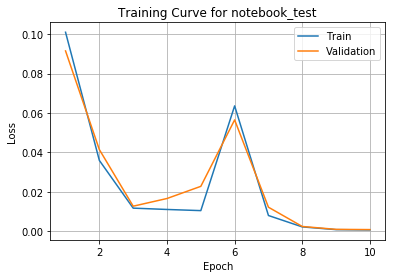

In [41]:
speaker_recog.training_monitor.plot()

In [43]:
speaker_recog_load = sr.SpeakerRecognition(data_path='/home/ubuntu/loop/data/vctk',
                        checkpoint='checkpoints/notebook_test/bestmodel.pth',
                        seq_len=300,
                        nspk=22,
                        max_seq_len=1000,
                        batch_size=64,
                        gpu=gpu,
                        exp_name='notebook_test')

In [44]:
speaker_recog_load.reload_checkpoint()

In [45]:
out = speaker_recog_load.evaluate()

Evaluation Valid (loss 0.00) epoch 1: 100%|██████████| 11/11 [00:00<00:00, 11.77it/s]


In [46]:
out[1]

1.0

#### Build again on Mon 16-Jul-18 for use in coding eval_curves.py

In [6]:
speaker_recog = sr.SpeakerRecognition(data_path='/home/ubuntu/loop/data/vctk',
                        checkpoint=None,
                        seq_len=300,
                        nspk=22,
                        max_seq_len=1000,
                        batch_size=64,
                        gpu=gpu,
                        exp_name='speaker-recognition-vctk-us')

/usr/local/lib/python2.7/dist-packages/torch/backends/cudnn/__init__.py:48: UserWarning: PyTorch was compiled without cuDNN support. To use cuDNN, rebuild PyTorch making sure the library is visible to the build system.
  "PyTorch was compiled without cuDNN support. To use cuDNN, rebuild "


In [7]:
eval_dict = speaker_recog.train(num_epochs=10)

Eval epoch 1:   0%|          | 0/11 [00:00<?, ?it/s]

Training accuracy (epoch 1): 0.986


Train epoch 2:   0%|          | 0/126 [00:00<?, ?it/s]

Validation accuracy (epoch 1): 0.990


Eval epoch 2:   0%|          | 0/11 [00:00<?, ?it/s]

Training accuracy (epoch 2): 0.991


Train epoch 3:   0%|          | 0/126 [00:00<?, ?it/s]

Validation accuracy (epoch 2): 0.993


Eval epoch 3:   0%|          | 0/11 [00:00<?, ?it/s]

Training accuracy (epoch 3): 0.993


Train epoch 4:   0%|          | 0/126 [00:00<?, ?it/s]

Validation accuracy (epoch 3): 0.991


Eval epoch 4:   0%|          | 0/11 [00:00<?, ?it/s]

Training accuracy (epoch 4): 0.998


Train epoch 5:   0%|          | 0/126 [00:00<?, ?it/s]

Validation accuracy (epoch 4): 0.996


Eval epoch 5:   0%|          | 0/11 [00:00<?, ?it/s]

Training accuracy (epoch 5): 0.991


Train epoch 6:   0%|          | 0/126 [00:00<?, ?it/s]

Validation accuracy (epoch 5): 0.990


Eval epoch 6:   0%|          | 0/11 [00:00<?, ?it/s]

Training accuracy (epoch 6): 0.999


Train epoch 7:   0%|          | 0/126 [00:00<?, ?it/s]

Validation accuracy (epoch 6): 0.994


Eval epoch 7:   0%|          | 0/11 [00:00<?, ?it/s]

Training accuracy (epoch 7): 0.999


Train epoch 8:   0%|          | 0/126 [00:00<?, ?it/s]

Validation accuracy (epoch 7): 0.991


Eval epoch 8:   0%|          | 0/11 [00:00<?, ?it/s]

Training accuracy (epoch 8): 0.999


Train epoch 9:   0%|          | 0/126 [00:00<?, ?it/s]

Validation accuracy (epoch 8): 0.999


Eval epoch 9:   0%|          | 0/11 [00:00<?, ?it/s]

Training accuracy (epoch 9): 1.000


Train epoch 10:   0%|          | 0/126 [00:00<?, ?it/s]

Validation accuracy (epoch 9): 0.999


Eval epoch 10:   0%|          | 0/11 [00:00<?, ?it/s]

Training accuracy (epoch 10): 1.000


Eval epoch 1:   0%|          | 0/126 [00:00<?, ?it/s]

Validation accuracy (epoch 10): 0.999


Evaluation Valid (loss 0.00) epoch 1: 100%|██████████| 11/11 [00:01<00:00, 10.88it/s]


In [13]:
speaker_recog_load = sr.SpeakerRecognition(data_path='/home/ubuntu/loop/data/vctk',
                        checkpoint='checkpoints/speaker-recognition-vctk-us/bestmodel.pth',
                        seq_len=300,
                        nspk=22,
                        max_seq_len=1000,
                        batch_size=64,
                        gpu=gpu,
                        exp_name='speaker-recognition-vctk-us')

In [16]:
speaker_recog_load.reload_checkpoint()

In [17]:
out = speaker_recog_load.evaluate()

Evaluation Valid (loss 0.00) epoch 1: 100%|██████████| 11/11 [00:00<00:00, 12.02it/s]


In [18]:
out[1]

0.9985443959243085

### Train on full VCTK-all dataset
This is the one that matters

In [40]:
speaker_recog = sr.SpeakerRecognition(data_path='/home/ubuntu/loop/data/vctk-16khz-cmu-no-boundaries-all',
                        checkpoint=None,
                        seq_len=300,
                        nspk=107,
                        max_seq_len=1000,
                        batch_size=64,
                        gpu=gpu,
                        exp_name='speaker_recognition_vctk_all')

In [41]:
eval_dict = speaker_recog.train(num_epochs=20)

Eval epoch 1:   0%|          | 0/68 [00:00<?, ?it/s]

Training accuracy (epoch 1): 0.875


Train epoch 2:   0%|          | 0/615 [00:00<?, ?it/s]

Validation accuracy (epoch 1): 0.869


Eval epoch 2:   0%|          | 0/68 [00:00<?, ?it/s]

Training accuracy (epoch 2): 0.955


Train epoch 3:   0%|          | 0/615 [00:00<?, ?it/s]

Validation accuracy (epoch 2): 0.940


Eval epoch 3:   0%|          | 0/68 [00:00<?, ?it/s]

Training accuracy (epoch 3): 0.966


Train epoch 4:   0%|          | 0/615 [00:00<?, ?it/s]

Validation accuracy (epoch 3): 0.952


Eval epoch 4:   0%|          | 0/68 [00:00<?, ?it/s]

Training accuracy (epoch 4): 0.971


Train epoch 5:   0%|          | 0/615 [00:00<?, ?it/s]

Validation accuracy (epoch 4): 0.959


Eval epoch 5:   0%|          | 0/68 [00:00<?, ?it/s]

Training accuracy (epoch 5): 0.977


Train epoch 6:   0%|          | 0/615 [00:00<?, ?it/s]

Validation accuracy (epoch 5): 0.964


Eval epoch 6:   0%|          | 0/68 [00:00<?, ?it/s]

Training accuracy (epoch 6): 0.983


Train epoch 7:   0%|          | 0/615 [00:00<?, ?it/s]

Validation accuracy (epoch 6): 0.967


Eval epoch 7:   0%|          | 0/68 [00:00<?, ?it/s]

Training accuracy (epoch 7): 0.985


Train epoch 8:   0%|          | 0/615 [00:00<?, ?it/s]

Validation accuracy (epoch 7): 0.970


Eval epoch 8:   0%|          | 0/68 [00:00<?, ?it/s]

Training accuracy (epoch 8): 0.981


Train epoch 9:   0%|          | 0/615 [00:00<?, ?it/s]

Validation accuracy (epoch 8): 0.965


Eval epoch 9:   0%|          | 0/68 [00:00<?, ?it/s]

Training accuracy (epoch 9): 0.984


Train epoch 10:   0%|          | 0/615 [00:00<?, ?it/s]

Validation accuracy (epoch 9): 0.972


Eval epoch 10:   0%|          | 0/68 [00:00<?, ?it/s]

Training accuracy (epoch 10): 0.982


Train epoch 11:   0%|          | 0/615 [00:00<?, ?it/s]

Validation accuracy (epoch 10): 0.967


Eval epoch 11:   0%|          | 0/68 [00:00<?, ?it/s]

Training accuracy (epoch 11): 0.984


Train epoch 12:   0%|          | 0/615 [00:00<?, ?it/s]

Validation accuracy (epoch 11): 0.966


Eval epoch 12:   0%|          | 0/68 [00:00<?, ?it/s]

Training accuracy (epoch 12): 0.987


Train epoch 13:   0%|          | 0/615 [00:00<?, ?it/s]

Validation accuracy (epoch 12): 0.968


Eval epoch 13:   0%|          | 0/68 [00:00<?, ?it/s]

Training accuracy (epoch 13): 0.991


Train epoch 14:   0%|          | 0/615 [00:00<?, ?it/s]

Validation accuracy (epoch 13): 0.972


Eval epoch 14:   0%|          | 0/68 [00:00<?, ?it/s]

Training accuracy (epoch 14): 0.973


Train epoch 15:   0%|          | 0/615 [00:00<?, ?it/s]

Validation accuracy (epoch 14): 0.959


Eval epoch 15:   0%|          | 0/68 [00:00<?, ?it/s]

Training accuracy (epoch 15): 0.987


Train epoch 16:   0%|          | 0/615 [00:00<?, ?it/s]

Validation accuracy (epoch 15): 0.971


Eval epoch 16:   0%|          | 0/68 [00:00<?, ?it/s]

Training accuracy (epoch 16): 0.985


Train epoch 17:   0%|          | 0/615 [00:00<?, ?it/s]

Validation accuracy (epoch 16): 0.968


Eval epoch 17:   0%|          | 0/68 [00:00<?, ?it/s]

Training accuracy (epoch 17): 0.985


Train epoch 18:   0%|          | 0/615 [00:00<?, ?it/s]

Validation accuracy (epoch 17): 0.969


Eval epoch 18:   0%|          | 0/68 [00:00<?, ?it/s]

Training accuracy (epoch 18): 0.991


Train epoch 19:   0%|          | 0/615 [00:00<?, ?it/s]

Validation accuracy (epoch 18): 0.980


Eval epoch 19:   0%|          | 0/68 [00:00<?, ?it/s]

Training accuracy (epoch 19): 0.988


Train epoch 20:   0%|          | 0/615 [00:00<?, ?it/s]

Validation accuracy (epoch 19): 0.969


Eval epoch 20:   0%|          | 0/68 [00:00<?, ?it/s]

Training accuracy (epoch 20): 0.986


Eval epoch 1:   0%|          | 0/615 [00:00<?, ?it/s]

Validation accuracy (epoch 20): 0.969


Evaluation Valid (loss 0.00) epoch 1: 100%|██████████| 68/68 [00:04<00:00, 16.18it/s]


In [42]:
out = speaker_recog.evaluate()

Evaluation Valid (loss 0.00) epoch 1: 100%|██████████| 68/68 [00:04<00:00, 16.38it/s]


In [43]:
out[1]

0.9685398655139289

In [44]:
speaker_recog_load = sr.SpeakerRecognition(data_path='/home/ubuntu/loop/data/vctk-16khz-cmu-no-boundaries-all',
                        checkpoint='checkpoints/speaker_recognition_vctk_all/bestmodel.pth',
                        seq_len=300,
                        nspk=107,
                        max_seq_len=1000,
                        batch_size=64,
                        gpu=gpu,
                        exp_name='notebook_test')

In [45]:
speaker_recog_load.reload_checkpoint()

In [46]:
out = speaker_recog_load.evaluate()

Evaluation Valid (loss 0.04) epoch 1: 100%|██████████| 68/68 [00:04<00:00, 16.31it/s]


In [47]:
out[1]

0.9798270893371758

In [52]:
eval_dict['valid_loss']

0.12572997153470436

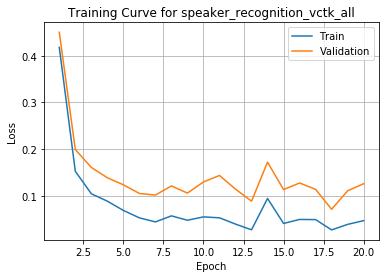

In [53]:
speaker_recog.training_monitor.plot()

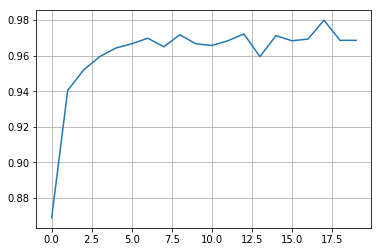

In [57]:
speaker_recog.training_monitor.data['valid_acc'].plot()
plt.grid(True)

In [60]:
eval_dict['valid_gt']

array([17, 14, 22, ..., 21, 62, 30])

In [61]:
eval_dict['valid_pred']

array([17, 14, 22, ..., 21, 62, 30])

Look at some examples of errors. What is top 2 accuracy? Does the incorrectly-predicted speaker have a speaker embedding that is very close in terms of cosine similarity?

### Try evaluating the trained speaker model on some synthesized samples